# Example Notebook for Correcting and loading FastCCD Images

This example reads data from teh FastCCD and corrects and rotates the images

## Getting Started

Load the ``databroker`` moudle, ``csxtools`` and various other dependencies

In [1]:
import numpy as np
from databroker import DataBroker, get_table
from csxtools import get_fastccd_images
from csxtools.ipynb import image_stack_to_movie
%matplotlib inline
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider, interact

## Get the data!

Load the headers without the images (using ``fill=False``)

In [2]:
bgnd = DataBroker['ce5042b7-00ae-49ca-9b11-b10c5661aaaa'] #[52440]
get_table(bgnd, fill=False)

time  sclr_chan4       say  slt1_yc        sx  \
1  2015-10-22 00:10:38.185091-04:00     2122834  3.249713  -0.3004  6.899999   

   slt1_yg     nptz  fccd_stats_total2      theta  sclr_chan5   ...    \
1   7.0003  6.21667         2871992040  19.499985      423651   ...     

         sz       npty    slt3_x    epu1_gap     gamma      npbx  slt2_xg  \
1  0.099999 -26.662465  11.26975  238.900342 -1.000007 -3.380105       10   

   pgm_energy                 fccd_image_lightfield  temp_b  
1  929.897551  7180b59d-5112-428e-b6a4-9bc8893220b0       0  

[1 rows x 51 columns]

In [3]:
data = DataBroker['b2596f8e-d220-4aea-8a55-8ccb17cbdacc'] #[52436]
get_table(data, fill=False)

time  sclr_chan4       say  slt1_yc        sx  \
1  2015-10-21 23:59:54.531477-04:00     2128440  3.249713  -0.3004  6.899999   

   slt1_yg      nptz  fccd_stats_total2      theta  sclr_chan5   ...    \
1   7.0003  6.216685         2873875362  19.499985      423638   ...     

         sz      npty    slt3_x    epu1_gap     gamma     npbx  slt2_xg  \
1  0.099999 -26.66246  11.26979  238.900346 -1.000007 -3.38011       10   

   pgm_energy                 fccd_image_lightfield  temp_b  
1  929.879892  20eed5d8-05e2-4b0e-bd3c-5edae7b15878       0  

[1 rows x 51 columns]

## Correct the FastCCD Images

Now correct the CCD images, using only a single background image. 

In the future this should be taken from the metadata associated with the data, or from the darkfield entry

In [4]:
images = get_fastccd_images(data, (bgnd, None, None))

## Now lets do an interactive plotting widget!

Thanks ``ipywidgets``!

In [5]:
def browse_frames(images, minmax):
    n = images.shape[0]
    def view_frame(i, vmin, vmax): 
        plt.figure(figsize=(16,16))
        plt.imshow(images[i], cmap='CMRmap', interpolation='nearest', vmin=vmin, vmax=vmax)
        plt.title('Frame {} Min = {} Max = {}'.format(i, vmin, vmax))
        plt.colorbar()
        plt.show()
    interact(view_frame, i=(0, n-1), vmin=minmax, vmax=minmax)

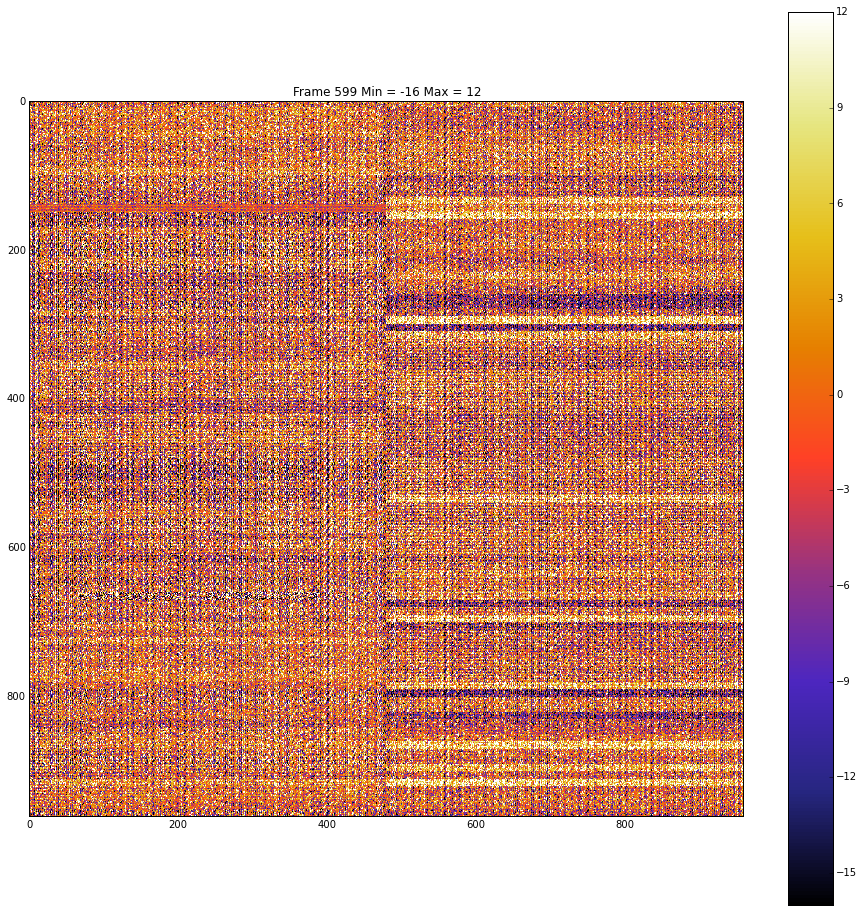

In [6]:
browse_frames(images, (-100, 100))

In [9]:
image_stack_to_movie(images, frames=100, vmin=-20, vmax=20)

In [10]:
import csxtools
csxtools.__version__

'0+untagged.43.g69df003.dirty'